In [2]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
import os

In [13]:
!rm -r data/xml/votes

rm: data/xml/votes: No such file or directory


In [14]:
!curl -s 'https://data.assemblee-nationale.fr/static/openData/repository/15/loi/scrutins/Scrutins_XV.xml.zip' > scrutins.zip

In [19]:
!curl -s 'https://data.assemblee-nationale.fr/static/openData/repository/15/vp/syceronbrut/syseron.xml.zip' > debats.zip

In [20]:
!unzip debats.zip

Archive:  debats.zip
  inflating: xml/compteRendu/CRSANR5L15S2018O1N043.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N191.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N118.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N172.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N076.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N195.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N107.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N049.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N248.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N099.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N135.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N005.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N199.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N218.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E1N041.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N175.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N184.xml  
  inflatin

  inflating: xml/compteRendu/CRSANR5L15S2018E1N013.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N075.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N226.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E1N044.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N066.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019E1N009.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N108.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E2N008.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N300.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N233.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N047.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N150.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N090.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N128.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019E2N008.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020E1N018.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N006.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2021O1N089.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N273.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N092.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N287.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N152.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E1N009.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N073.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N032.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N016.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N001.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N018.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N303.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E3N008.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N054.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E1N001.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N240.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N211.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2020O1N151.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N223.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N104.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N034.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N141.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N031.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N263.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N252.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N077.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N012.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N165.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N051.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E1N038.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N174.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N130.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019E2N012.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N153.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2019O1N083.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E1N005.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N011.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N082.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N030.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N043.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N312.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N204.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N164.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E2N016.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N083.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020E2N017.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N109.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N252.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N309.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019E2N003.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N244.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2018O1N217.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N004.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N046.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N143.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N093.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N075.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020E1N023.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N087.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N060.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N094.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N084.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N119.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N069.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N062.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N152.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N011.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N247.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2021O1N010.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N245.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N233.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N081.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N179.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N122.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N015.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N099.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N077.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E1N022.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N273.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N208.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N087.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N283.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N009.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N017.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N018.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2020O1N253.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N249.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N029.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N082.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N201.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N285.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N036.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020E1N006.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N111.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N119.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N023.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N006.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N138.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N033.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N065.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N171.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E3N007.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2019O1N195.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N063.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N174.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N210.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N168.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N232.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N089.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N235.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N007.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N234.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N096.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E1N013.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N030.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N252.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N065.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N081.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N238.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2022O1N101.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N128.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N265.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N154.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E2N021.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N173.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N087.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N042.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N239.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N211.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021E3N005.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E2N012.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N052.xml  
  inflating: xml/compteRendu/CRSANR5L15S2021O1N166.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N040.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019E1N020.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N069.xml  
  inflating: xml/compteRendu/CR

  inflating: xml/compteRendu/CRSANR5L15S2022O1N066.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N180.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N194.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N189.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N188.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018O1N243.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N148.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N107.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N140.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020E1N026.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N177.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N004.xml  
  inflating: xml/compteRendu/CRSANR5L15S2018E2N011.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N013.xml  
  inflating: xml/compteRendu/CRSANR5L15S2022O1N108.xml  
  inflating: xml/compteRendu/CRSANR5L15S2019O1N115.xml  
  inflating: xml/compteRendu/CRSANR5L15S2020O1N065.xml  
  inflating: xml/compteRendu/CR

In [21]:
!mv xml/compteRendu data/xml/compteRendus

In [22]:
!rm debats.zip

In [47]:
tree=et.parse('data/xml/votes/VTANR5L15V2930.xml')
root = tree.getroot()
root

<Element '{http://schemas.assemblee-nationale.fr/referentiel}scrutin' at 0x109fbe7c0>

In [48]:
nonVotants = ""
pours = ""
contres = ""
abstentions = ""

In [49]:
for child in root.iter():
    if child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}dateScrutin':
        date = child.text
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}titre':
        objet = child.text
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}nonVotants':
        for littlechild in child.iter():
            if littlechild.tag == '{http://schemas.assemblee-nationale.fr/referentiel}acteurRef':
                nonVotants += littlechild.text + " "
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}pours':
        for littlechild in child.iter():
            if littlechild.tag == '{http://schemas.assemblee-nationale.fr/referentiel}acteurRef':
                pours += " "
                pours += littlechild.text
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}contres':
        for littlechild in child.iter():
            if littlechild.tag == '{http://schemas.assemblee-nationale.fr/referentiel}acteurRef':
                contres += " "
                contres += littlechild.text
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}abstentions':
        for littlechild in child.iter():
            if littlechild.tag == '{http://schemas.assemblee-nationale.fr/referentiel}acteurRef':
                abstentions += " "
                abstentions += littlechild.text
    elif child.tag == '{http://schemas.assemblee-nationale.fr/referentiel}miseAuPoint':
        break
    

In [50]:
print(f'Date : {date}')
print(f'Scrutin : {objet}')
print(f'Non votants : {nonVotants}')
print(f'Pours : {pours}')
print(f'Contres : {contres}')
print(f'Abstentions : {abstentions}')

Date : 2020-10-02
Scrutin : l'amendement n° 1106 rectifié de Mme Beaudouin-Hubiere après l'article 46 du projet de loi d'accélération et de simplification de l'action publique (première lecture).
Non votants : PA606171 PA721824 
Pours :  PA672 PA721296 PA718876 PA719130 PA719372 PA719388 PA719756 PA719830 PA719850 PA720222 PA720318 PA721560 PA721726 PA722000 PA722038 PA722046 PA722170 PA722336 PA642695 PA642847 PA721286 PA720162 PA720652 PA722162 PA331567
Contres : 
Abstentions : 


In [51]:
dico = {}
dico['date'] = []
dico['objet'] = []
dico['nonVotants'] = []
dico

{'date': [], 'objet': [], 'nonVotants': []}

In [52]:
dico['date'].append(date)
dico['objet'].append(objet)
dico['nonVotants'].append(nonVotants)
dico

{'date': ['2020-10-02'],
 'objet': ["l'amendement n° 1106 rectifié de Mme Beaudouin-Hubiere après l'article 46 du projet de loi d'accélération et de simplification de l'action publique (première lecture)."],
 'nonVotants': ['PA606171 PA721824 ']}

In [53]:
votes = pd.DataFrame(dico)
votes

,date,objet,nonVotants
0,2020-10-02,l'amendement n° 1106 rectifié de Mme Beaudouin...,PA606171 PA721824


In [54]:
votes.loc[0,'nonVotants']

'PA606171 PA721824 '

In [3]:
votes = pd.read_csv('data/votes.csv')
votes.sort_values(by="date", inplace=True)
votes.reset_index(inplace=True, drop=True)
votes

,date,objet,nonVotants,pours,contres,abstentions
0,2017-07-04,la declaration de politique generale du Gouver...,PA332747 PA337633 PA331481 PA605131 PA607395 P...,PA721262 PA722398 PA2449 PA643127 PA2828 PA719...,PA345722 PA330240 PA1498 PA2155 PA2086 PA72058...,PA998 PA2529 PA2796 PA2377 PA720210 PA606712 P...
1,2017-07-06,l'ensemble du projet de loi prorogeant l'appli...,PA332747,PA721262 PA722398 PA643127 PA2828 PA719952 PA2...,PA588884 PA718860 PA719578 PA720286 PA720422 P...,NaN
2,2017-07-10,l'amendement n° 120 de M. Quatennens et les am...,PA332747,PA1592 PA267233 PA608172 PA719930 PA719608 PA7...,PA721262 PA719952 PA608083 PA721880 PA718768 P...,PA588884
3,2017-07-10,l'amendement n° 441 de M. Vallaud à l'article ...,PA332747,PA1592 PA267233 PA332614 PA608172 PA719930 PA6...,PA721262 PA719952 PA609520 PA608083 PA721880 P...,NaN
4,2017-07-10,l'amendement n° 440 de M. Vallaud à l'article ...,PA332747,PA1592 PA332614 PA608172 PA719930 PA608292 PA7...,PA721262 PA719952 PA609520 PA608083 PA721880 P...,NaN
...,...,...,...,...,...,...
4276,2022-01-05,l'amendement n° 109 de M. Morel-À-L'Huissier à...,PA605991,PA721036 PA2377 PA345722 PA720210 PA1874 PA720...,PA2449 PA719118 PA605084 PA606202 PA605963 PA6...,PA717379 PA719162 PA720728 PA722284 PA722260 P...
4277,2022-01-10,l'amendement n° 36 de Mme Verdier-Jouclas et l...,PA605991,PA672 PA717379 PA719032 PA719170 PA719202 PA71...,NaN,PA605069 PA721960
4278,2022-01-10,l'article premier du projet de loi en faveur d...,PA605991,PA672 PA717379 PA719032 PA719170 PA719202 PA71...,NaN,PA721474 PA722308 PA774954 PA605069 PA267330 P...
4279,2022-01-10,l'amendement n° 31 du Gouvernement et les amen...,PA721824,PA722398 PA719668 PA672 PA717379 PA718674 PA71...,NaN,NaN


In [4]:
def trait_chaine(chaine):
    return chaine.strip().split()
columns = ['nonVotants', 'pours', 'contres', 'abstentions']
def nettoyage(liste):
    if liste == ['nan']:
        liste = []
    return liste

In [5]:
for column in columns:
    votes[column] = votes[column].map(str)
    votes[column] = votes[column].map(trait_chaine)

In [6]:
votes = votes.applymap(nettoyage)

In [7]:
for column in columns:
    nb_column = "nb_" + column
    votes[nb_column] = votes[column].map(len)

In [8]:
votes

,date,objet,nonVotants,pours,contres,abstentions,nb_nonVotants,nb_pours,nb_contres,nb_abstentions
0,2017-07-04,la declaration de politique generale du Gouver...,"[PA332747, PA337633, PA331481, PA605131, PA607...","[PA721262, PA722398, PA2449, PA643127, PA2828,...","[PA345722, PA330240, PA1498, PA2155, PA2086, P...","[PA998, PA2529, PA2796, PA2377, PA720210, PA60...",9,370,67,129
1,2017-07-06,l'ensemble du projet de loi prorogeant l'appli...,[PA332747],"[PA721262, PA722398, PA643127, PA2828, PA71995...","[PA588884, PA718860, PA719578, PA720286, PA720...",[],1,137,13,0
2,2017-07-10,l'amendement n° 120 de M. Quatennens et les am...,[PA332747],"[PA1592, PA267233, PA608172, PA719930, PA71960...","[PA721262, PA719952, PA608083, PA721880, PA718...",[PA588884],1,23,130,1
3,2017-07-10,l'amendement n° 441 de M. Vallaud à l'article ...,[PA332747],"[PA1592, PA267233, PA332614, PA608172, PA71993...","[PA721262, PA719952, PA609520, PA608083, PA721...",[],1,26,144,0
4,2017-07-10,l'amendement n° 440 de M. Vallaud à l'article ...,[PA332747],"[PA1592, PA332614, PA608172, PA719930, PA60829...","[PA721262, PA719952, PA609520, PA608083, PA721...",[],1,22,138,0
...,...,...,...,...,...,...,...,...,...,...
4276,2022-01-05,l'amendement n° 109 de M. Morel-À-L'Huissier à...,[PA605991],"[PA721036, PA2377, PA345722, PA720210, PA1874,...","[PA2449, PA719118, PA605084, PA606202, PA60596...","[PA717379, PA719162, PA720728, PA722284, PA722...",1,83,141,14
4277,2022-01-10,l'amendement n° 36 de Mme Verdier-Jouclas et l...,[PA605991],"[PA672, PA717379, PA719032, PA719170, PA719202...",[],"[PA605069, PA721960]",1,46,0,2
4278,2022-01-10,l'article premier du projet de loi en faveur d...,[PA605991],"[PA672, PA717379, PA719032, PA719170, PA719202...",[],"[PA721474, PA722308, PA774954, PA605069, PA267...",1,43,0,9
4279,2022-01-10,l'amendement n° 31 du Gouvernement et les amen...,[PA721824],"[PA722398, PA719668, PA672, PA717379, PA718674...",[],[],1,78,0,0


In [9]:
mp = 'PA1838'
mp_id = int(mp.strip('PA'))

In [10]:
def identify_mp(liste):
    vote = 0
    if mp in liste:
        vote = 1
    return vote

In [11]:
votes_mp = votes.copy().drop(columns=['nb_pours', 'nb_contres', 'nb_nonVotants', 'nb_abstentions'])

In [12]:
for column in columns:
    votes_mp[column] = votes_mp[column].map(identify_mp)

In [13]:
votes_mp['controle'] = votes_mp['nonVotants'] + votes_mp['pours'] + votes_mp['contres'] + votes_mp['abstentions']
votes_mp['controle'].unique()


array([1, 0])

In [14]:
votes_mp = votes_mp[votes_mp['controle'] == 1].drop(columns='controle')
votes_mp

,date,objet,nonVotants,pours,contres,abstentions
0,2017-07-04,la declaration de politique generale du Gouver...,0,0,0,1
11,2017-07-11,l'amendement n° 119 de M. Quatennens et les am...,0,0,1,0
59,2017-07-25,l'amendement n° 315 de M. Roussel après l'arti...,0,0,1,0
60,2017-07-25,l'amendement n° 314 de M. Roussel après l'arti...,0,0,1,0
61,2017-07-25,l'amendement n° 80 de M. Marleix et les amende...,0,1,0,0
...,...,...,...,...,...,...
4272,2022-01-05,l'amendement n° 185 de Mme Panot après l'artic...,0,1,0,0
4273,2022-01-05,l'article 2 du projet de loi renforçant les ou...,0,0,1,0
4274,2022-01-05,l'ensemble du projet de loi renforçant les out...,0,0,1,0
4275,2022-01-05,l'amendement n° 303 de Mme Lorho et les amende...,0,0,1,0


In [15]:
print(f'Participation à {len(votes_mp)} scrutins sur {len(votes)}')
print(f'Votes pour : {votes_mp.pours.sum()}')
print(f'Votes contre : {votes_mp.contres.sum()}')
print(f'Abstentions : {votes_mp.abstentions.sum()}')
print(f'Non votant : {votes_mp.nonVotants.sum()}')

Participation à 396 scrutins sur 4281
Votes pour : 217
Votes contre : 160
Abstentions : 19
Non votant : 0


In [30]:
pours = votes_mp.pours.sum()
contres = votes_mp.contres.sum()
abstentions = votes_mp.abstentions.sum()
nonVotants = votes_mp.nonVotants.sum()
participation = pours + contres + abstentions + nonVotants
absence = len(votes) - participation

In [31]:
import matplotlib.pyplot as plt

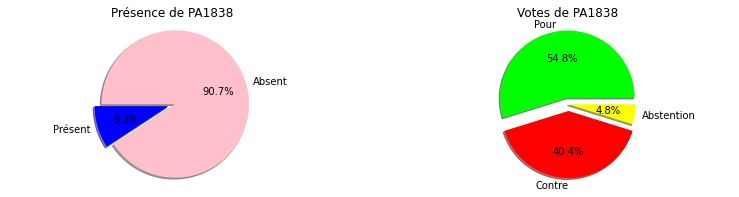

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1labels = ['Présent', 'Absent']
ax1sizes = [participation, absence]
ax1colors = ['blue', 'pink']
ax1explode = (0.1, 0)
ax1.pie(ax1sizes, labels=ax1labels, explode=ax1explode,
        colors=ax1colors, autopct='%1.1f%%', shadow=True,
        startangle=180)
ax1.axis('equal')
ax1.set_title(f"Présence de {mp}")
ax2labels = ['Pour', 'Contre', 'Abstention', 'Non votant']
ax2sizes = [pours, contres, abstentions, nonVotants]
ax2colors = ['lime', 'red', 'yellow', 'lightgray']
ax2explode = (0.1, 0.1, 0, 0)
if nonVotants == 0:
    ax2labels = ax2labels[0: -1]
    ax2sizes = ax2sizes[0: -1]
    ax2colors = ax2colors[0: -1]
    ax2explode = (0.1, 0.1, 0)
ax2.pie(ax2sizes, labels=ax2labels, explode=ax2explode,
        colors=ax2colors, autopct='%1.1f%%', shadow=True,
        startangle=0)
ax2.axis('equal')
ax2.set_title(f"Votes de {mp}")
plt.show()

In [29]:
print(participation, absence)

396 0


In [2]:
mps = pd.read_csv('data/current_mps.csv', sep=';')
mps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      570 non-null    int64  
 1   nom                     570 non-null    object 
 2   nom_de_famille          570 non-null    object 
 3   prenom                  570 non-null    object 
 4   sexe                    570 non-null    object 
 5   date_naissance          570 non-null    object 
 6   lieu_naissance          569 non-null    object 
 7   num_deptmt              570 non-null    object 
 8   nom_circo               570 non-null    object 
 9   num_circo               570 non-null    int64  
 10  mandat_debut            570 non-null    object 
 11  mandat_fin              0 non-null      float64
 12  ancien_depute           570 non-null    int64  
 13  groupe_sigle            570 non-null    object 
 14  parti_ratt_financier    570 non-null    ob

In [257]:
mps[mps['id_an'] == mp_id]

,id,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,...,anciens_mandats,profession,place_en_hemicycle,url_an,id_an,slug,url_nosdeputes,url_nosdeputes_api,nb_mandats,twitter
3,6,Cyrille Isaac-Sibille,Isaac-Sibille,Cyrille,H,1958-04-30,Lyon 6 (Rhône),69,Rhône,12,...,21/06/2017 / /,Médecin,183,http://www2.assemblee-nationale.fr/deputes/fic...,722374,cyrille-isaac-sibille,https://www.nosdeputes.fr/cyrille-isaac-sibille,https://www.nosdeputes.fr/cyrille-isaac-sibill...,1,Cisaacsibille


In [44]:
name = 'Cy'
mps[mps['nom'].str.contains(name.capitalize())][['nom', 'id_an']].loc[index[0], 'id_an'])

SyntaxError: unmatched ')' (2227949398.py, line 2)

In [259]:
Id = input('Quelle ligne ? ')

Quelle ligne ? 130


In [261]:
mp = 'PA' + str(mps.loc[int(Id), 'id_an'])
mp

'PA1838'

In [10]:
votes = pd.read_csv('data/votes.csv')
votes.sort_values(by="date", inplace=True)
mps = pd.read_csv('data/current_mps.csv', sep=';')

In [15]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 0 to 3647
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         4281 non-null   object
 1   objet        4281 non-null   object
 2   nonVotants   4280 non-null   object
 3   pours        4281 non-null   object
 4   contres      3921 non-null   object
 5   abstentions  3408 non-null   object
dtypes: object(6)
memory usage: 234.1+ KB


In [11]:
votes_mps = mps[['nom', 'num_deptmt', 'parti_ratt_financier', 'id_an']]

In [12]:
for mp in votes_mps.id_an:
    mp_code = "PA" + str(mp)
    print(mp_code)

PA718902
PA721384
PA719372
PA722374
PA721262
PA609332
PA721888
PA719318
PA643205
PA720704
PA722312
PA720878
PA720622
PA719388
PA335612
PA720190
PA722046
PA720652
PA722268
PA333818
PA2828
PA607619
PA719616
PA718962
PA605036
PA719006
PA333421
PA720520
PA718978
PA719052
PA605518
PA720108
PA643127
PA720256
PA330008
PA719866
PA720586
PA718910
PA695100
PA266797
PA720746
PA721644
PA720900
PA335054
PA642764
PA330909
PA721784
PA1695
PA721984
PA332523
PA642847
PA718744
PA342935
PA267794
PA2150
PA720046
PA606507
PA720210
PA720146
PA721702
PA720092
PA336175
PA721314
PA721800
PA722150
PA720170
PA719930
PA608292
PA719202
PA722022
PA719412
PA722008
PA1008
PA719448
PA722252
PA345722
PA719608
PA721450
PA722118
PA719972
PA719272
PA267306
PA332614
PA722202
PA720492
PA719194
PA718876
PA717167
PA330240
PA719684
PA718682
PA722094
PA721372
PA721836
PA720960
PA721742
PA721816
PA721004
PA923
PA720728
PA721486
PA721808
PA331582
PA721234
PA720684
PA719520
PA267324
PA719770
PA721976
PA721734
PA712015
PA722320
PA3

In [13]:
mp = mps.id_an[0]
mp_code = "PA" + str(mp)
mp_code

'PA718902'

In [14]:
columns = ['nonVotants', 'pours', 'contres', 'abstentions']
def trait_chaine(chaine):
    return chaine.strip().split()
def nettoyage(liste):
    if liste == ['nan']:
        liste = []
    return liste
def identify_mp(liste):
    vote = 0
    if mp in liste:
        vote = 1
    return vote

In [ ]:
votes_mp = votes.copy().drop(columns=['nb_pours', 'nb_contres', 'nb_nonVotants', 'nb_abstentions'])

In [8]:

for column in columns:
    votes_mp[column] = votes_mp[column].map(identify_mp)
    votes_mp['controle'] = votes_mp['nonVotants'] + votes_mp['pours'] + votes_mp['contres'] + votes_mp['abstentions']
    votes_mp = votes_mp[votes_mp['controle'] == 1].drop(columns='controle')
    votes_mps[mps.id_an == mp]['nb_scrutins'] = len(votes_mp)
    votes_mps[mps.id_an == mp]['nb_nonVotants'] = votes_mp.nonVotants.sum()
    votes_mps[mps.id_an == mp]['nb_pours'] = votes_mp.pours.sum()
    votes_mps[mps.id_an == mp]['nb_contres'] = votes_mp.contres.sum()
    votes_mps[mps.id_an == mp]['nb_contres'] = votes_mp.abstentions.sum()
votes_mps

NameError: name 'votes' is not defined

In [1]:
import pandas as pd

In [3]:
votes_mps = pd.read_csv('data/votes_mps.csv')
votes_mps

,nom,num_deptmt,parti_ratt_financier,pours,contres,abstentions,nonVotants,scrutins
0,Cédric Roussel,06,La République en Marche,343,567,16,0,926
1,Pascale Fontenel-Personne,72,La République en Marche,201,265,26,0,492
2,Guillaume Kasbarian,28,La République en Marche,395,634,29,0,1058
3,Cyrille Isaac-Sibille,69,Mouvement Démocrate,358,381,10,0,749
4,Guillaume Vuilletet,95,La République en Marche,385,726,2,0,1113
...,...,...,...,...,...,...,...,...
565,Luc Lamirault,28,Mouvement Démocrate,134,77,10,0,221
566,Christelle Petex-Levet,74,Les Républicains,17,16,9,0,42
567,Lamia El Aaraje,75,Parti socialiste,98,37,6,0,141
568,Sophie Métadier,37,"Union des démocrates, radicaux et libéraux",27,16,8,0,51
